In [24]:
import io
import os
import platform
import pdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import cm

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import preprocessing

In [25]:
data=pd.read_csv("./vancouver.csv")
data=data.iloc[:,2:]
data.replace(9999,np.nan,inplace=True)
data.replace(-999,np.nan,inplace=True)
for i in range(len(data)):
    for j in range(len(data.columns)):
        if np.isnan(data.iat[i,j]):
            if i==0:
                data.iloc[i,j]=data.iat[i+1,j]
            elif i==len(data)-1:
                data.iloc[i,j]=data.iat[i-1,j]
            else:
                data.iloc[i,j]=np.nanmean([data.iat[i-1,j],data.iat[i+1,j]])

In [26]:
# data.fillna(np.mean(data),inplace=True)

In [27]:
data.tail()

,TEMP_MEAN,SO2,O3,CO,HUMIDITY,NO2,NO,WDIR_SCLR,RAD_TOTAL,WSPD_VECT,WSPD_SCLR,ATM_PRESS_1HR,WDIR_VECT,PM25,PRECIP_TOTAL,PM10
17524,10.9,0.5,24.0,0.15,80.6,7.2,0.4,83.6,0.0,4.50,4.59,101.1,82.2,3.6,0.0,20.5
17525,10.8,0.4,23.8,0.13,82.0,7.3,0.5,90.4,11.6,6.83,7.17,101.1,91.1,3.2,0.0,20.5
17526,10.8,0.5,21.6,0.15,83.5,9.7,1.2,87.0,55.3,6.61,6.90,101.1,86.9,2.9,0.0,20.5
17527,11.4,0.6,17.3,0.18,83.0,14.8,6.2,81.8,113.8,4.77,5.05,101.2,81.7,3.5,0.0,20.5
17528,12.3,0.7,18.7,0.19,79.2,13.9,4.7,94.8,182.7,4.77,2.98,101.2,81.7,3.2,0.0,20.5


In [28]:
dataset=pd.DataFrame(data)
# dataset=pd.to_numeric(dataset, errors='coerce')
# train_data=dataset.head(14023)
# valid_data=dataset.drop(train_data.index)
scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(dataset) 
# dataset.loc[:,:] = scaled_values

In [29]:
dataset.head()

,TEMP_MEAN,SO2,O3,CO,HUMIDITY,NO2,NO,WDIR_SCLR,RAD_TOTAL,WSPD_VECT,WSPD_SCLR,ATM_PRESS_1HR,WDIR_VECT,PM25,PRECIP_TOTAL,PM10
0,18.1,0.30,20.20,0.210,76.1,15.60,6.00,307.7,0.0,12.59,12.82,101.7,308.1,3.3,0.0,9.2
1,18.1,0.30,12.20,0.180,73.0,11.20,5.30,308.1,0.0,14.29,14.64,101.7,309.0,2.5,0.0,6.5
2,17.4,0.40,11.10,0.180,77.5,13.60,9.30,309.0,0.0,13.58,13.83,101.7,308.8,2.5,0.0,7.7
3,17.0,0.20,25.10,0.140,83.6,7.20,5.20,296.5,0.0,17.47,17.79,101.6,296.6,3.6,0.0,10.5
4,17.0,0.25,20.25,0.155,80.5,9.65,6.05,301.9,0.0,16.62,17.04,101.6,301.8,3.2,0.0,6.9


In [30]:
dataset.describe()

,TEMP_MEAN,SO2,O3,CO,HUMIDITY,NO2,NO,WDIR_SCLR,RAD_TOTAL,WSPD_VECT,WSPD_SCLR,ATM_PRESS_1HR,WDIR_VECT,PM25,PRECIP_TOTAL,PM10
count,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000
mean,10.877917,0.348773,16.930621,0.238480,78.101597,15.151455,9.903018,159.489674,131.440570,9.555761,10.140468,101.083490,160.406241,5.577751,0.138593,10.370312
std,6.394508,0.429893,11.643593,0.140216,14.132836,10.124329,21.005118,90.570842,214.942927,5.603915,5.533016,0.785188,89.956617,5.462459,0.534607,7.300602
min,-6.800000,0.000000,-0.700000,0.010000,17.500000,0.300000,-1.200000,0.000000,0.000000,0.050000,0.980000,97.600000,0.200000,0.000000,0.000000,0.000000
25%,6.300000,0.100000,6.600000,0.150000,68.700000,7.000000,0.500000,90.600000,0.000000,5.570000,6.090000,100.700000,91.300000,2.500000,0.000000,6.100000
50%,10.700000,0.200000,16.800000,0.200000,79.900000,12.700000,2.500000,121.800000,5.300000,8.640000,9.160000,101.100000,123.400000,4.200000,0.000000,8.700000
75%,15.800000,0.500000,25.800000,0.270000,89.500000,21.600000,8.800000,257.800000,179.100000,12.560000,13.090000,101.600000,258.600000,6.800000,0.000000,12.400000
max,28.600000,7.500000,75.000000,1.690000,99.900000,70.800000,291.400000,359.900000,908.200000,48.240000,49.020000,103.500000,359.900000,209.600000,16.000000,119.400000


In [31]:
data_set=np.asarray(dataset,dtype=np.float32)

In [32]:
seq_len = 30 + 1
x=len(data_set)-seq_len
sequences = [data_set[t:t+seq_len] for t in range(x)]
for i in range(len(sequences)):
    sequences[i]=scaler.fit_transform(sequences[i])

In [33]:
len(sequences)

17498

In [34]:
seq=torch.FloatTensor(sequences)

In [35]:
seq.shape

torch.Size([17498, 31, 16])

In [36]:
split_row=round(0.90*seq.size(0))
x_train_set=seq[:split_row, :-1]
y_train_set=seq[:split_row, -1]
x_valid_set=seq[split_row:, :-1]
y_valid_set=seq[split_row:, -1]

In [37]:
print(x_train_set.shape)
print(y_train_set.shape)
print(x_valid_set.shape)
print(y_valid_set.shape)

torch.Size([15748, 30, 16])
torch.Size([15748, 16])
torch.Size([1750, 30, 16])
torch.Size([1750, 16])


In [38]:
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers=2,dropout=0,bidirectional=False):
        super(LSTM,self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.dropout=dropout
        self.bidirectional=bidirectional
        self.lstm = nn.LSTM(input_size,
                            hidden_size,
                            num_layers,
                            dropout=dropout,
                            bidirectional=bidirectional)
        self.linear = nn.Linear(hidden_size, input_size)
        
    def forward(self,inputs,hidden):
        outputs,hidden=self.lstm(inputs,hidden)
        predictions=self.linear(outputs[-1])
        return predictions,outputs,hidden
    
    def init_hidden(self,batch_size):
        num_directions=2 if self.bidirectional else 1
        hidden = (torch.zeros(self.num_layers*num_directions, batch_size, self.hidden_size),
                  torch.zeros(self.num_layers*num_directions, batch_size, self.hidden_size))
        return hidden

In [39]:
def get_batch(x,y,i,batch_size):
    if x.dim() == 2:
        x = x.unsqueeze(2)
    batch_x = x[(i*batch_size):(i*batch_size)+batch_size, :, :]
    batch_y = y[(i*batch_size):(i*batch_size)+batch_size]

    # Reshape Tensors into (seq_len, batch_size, input_size) format for the LSTM.
    batch_x = batch_x.transpose(0, 1)
    
    return batch_x, batch_y

In [40]:
def train(model,x_train_set,y_train_set,optimizer,batch_size,epoch):
    num_sequences=x_train_set.size(0)
    num_batches=num_sequences//batch_size
    
    total_loss=0
    
    model.train()
    for i in range(num_batches):
        # Get input and target batches and reshape for LSTM.
        batch_x, batch_y = get_batch(x_train_set, y_train_set, i, batch_size)

        # Reset the gradient.
        lstm.zero_grad()
        
        # Initialize the hidden states (see the function lstm.init_hidden(batch_size)).
        hidden = lstm.init_hidden(batch_size)
        
        # Complete a forward pass.
        y_pred, outputs, hidden = lstm(batch_x,hidden)
        
        # Calculate the loss with the 'loss_fn'.
        loss = loss_fn(y_pred,batch_y)
        
        # Compute the gradient.
        loss.backward()
        
        # Clip to the gradient to avoid exploding gradient.
        nn.utils.clip_grad_norm_(lstm.parameters(), max_grad_norm)

        # Make one step with optimizer.
        optimizer.step()
        
        # Accumulate the total loss.
        total_loss += loss.data
        
    print("Epoch {}: Loss = {:.8f}".format(epoch+1, total_loss/num_batches))
    return total_loss/num_batches

In [41]:
def eval(model,x_valid_set,y_valid_set,optimizer,batch_size):
    num_sequences=x_valid_set.size(0)
    num_batches=num_sequences//batch_size
    
    total_loss=0
    
    model.eval()
    for i in range(num_batches):
        # Get input and target batches and reshape for LSTM.
        batch_x, batch_y = get_batch(x_valid_set, y_valid_set, i, batch_size)

        # Reset the gradient.
        lstm.zero_grad()
        
        # Initialize the hidden states (see the function lstm.init_hidden(batch_size)).
        hidden = lstm.init_hidden(batch_size)
        
        # Complete a forward pass.
        y_pred, outputs, hidden = lstm(batch_x,hidden)
        
        # Calculate the loss with the 'loss_fn'.
        loss = loss_fn(y_pred,batch_y)
        
        # Compute the gradient.
        loss.backward()
        
        # Clip to the gradient to avoid exploding gradient.
        nn.utils.clip_grad_norm_(lstm.parameters(), max_grad_norm)

        # Make one step with optimizer.
        optimizer.step()
        
        # Accumulate the total loss.
        total_loss += loss.data

    print("Validation: Loss = {:.8f}".format(total_loss/num_batches))
    return total_loss/num_batches

In [42]:
def save_model(epoch, model, path='./'):
    
    # file name and path 
    filename = path + 'vancouver.pt'
    
    # load the model parameters 
    torch.save(model.state_dict(), filename)
    
    
    return model

In [43]:
def load_model(epoch, model, path='./'):
    
    # file name and path 
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # load the model parameters 
    model.load_state_dict(torch.load(filename))
    
    
    return model

Training model for 30 epoch
Epoch 1: Loss = 0.06152879
Validation: Loss = 0.03949843
Epoch 2: Loss = 0.03668826
Validation: Loss = 0.03217665
Epoch 3: Loss = 0.03224830
Validation: Loss = 0.02941380
Epoch 4: Loss = 0.03048507
Validation: Loss = 0.02826443
Epoch 5: Loss = 0.02950189
Validation: Loss = 0.02747993
Epoch 6: Loss = 0.02875098
Validation: Loss = 0.02692362
Epoch 7: Loss = 0.02825264
Validation: Loss = 0.02659697
Epoch 8: Loss = 0.02793995
Validation: Loss = 0.02636658
Epoch 9: Loss = 0.02770331
Validation: Loss = 0.02617960
Epoch 10: Loss = 0.02750557
Validation: Loss = 0.02601817
Epoch 11: Loss = 0.02733195
Validation: Loss = 0.02587440
Epoch 12: Loss = 0.02717480
Validation: Loss = 0.02574445
Epoch 13: Loss = 0.02702963
Validation: Loss = 0.02562607
Epoch 14: Loss = 0.02689403
Validation: Loss = 0.02551761
Epoch 15: Loss = 0.02676650
Validation: Loss = 0.02541774
Epoch 16: Loss = 0.02664623
Validation: Loss = 0.02532529
Epoch 17: Loss = 0.02653285
Validation: Loss = 0.0252

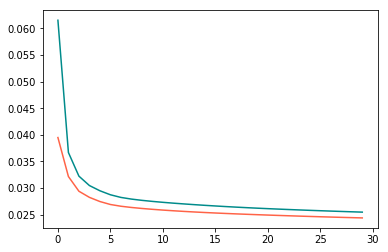

In [44]:
input_size=16
hidden_size=24
num_layers=2
lstm=LSTM(input_size,hidden_size)

learning_rate=0.001
max_grad_norm=5
loss_fn = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)

batch_size = 8
num_epochs = 30 #3
# num_sequences = x_train_set.size(0)
# num_batches = num_sequences //batch_size

checkpoint_freq = 10
path = './'

train_losses=[]
valid_losses=[]

print("Training model for {} epoch".format(num_epochs))
for epoch in range(num_epochs):
    total_loss = 0

    # Shuffle input and target sequences.
    idx = torch.randperm(x_train_set.size(0))
    x = x_train_set[idx]
    y = y_train_set[idx]

    train_loss=train(lstm,x_train_set,y_train_set,optimizer,batch_size,epoch)
    valid_loss=eval(lstm,x_valid_set,y_valid_set,optimizer,batch_size)
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    # Checkpoint
    if epoch % checkpoint_freq ==0:
        save_model(epoch, lstm, path)
        
# Last checkpoint
save_model(num_epochs, lstm, path)
    
print("\n\n\nOptimization ended.\n")

plt.plot(train_losses, color="darkcyan", label="train")
plt.plot(valid_losses, color="tomato",label="validation")
plt.show()

In [45]:
def predict_one_hour(model,x_valid_set,input_size,num_steps):
    predictions=torch.zeros(num_steps)
    for i, x in enumerate(x_valid_set):
        hidden=model.init_hidden(1)
        y_pred,_,_=model(x.contiguous().view(-1, 1, input_size),hidden)
        predictions[i]=y_pred[:,-3]
    return predictions

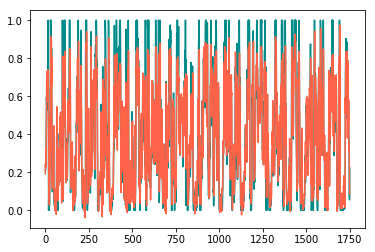

In [46]:
one_step_predictions = predict_one_hour(lstm, x_valid_set, input_size, y_valid_set.size(0))
plt.plot(y_valid_set[:,-3].data.numpy(),color='darkcyan')
plt.plot(one_step_predictions.data.numpy(),color='tomato')
plt.show()